## Process: Exploratory Data Analysis (EDA)



We spend a lot of time refining our raw data. 

Data pre-processing and Feature Engineering plays a key role in any data process

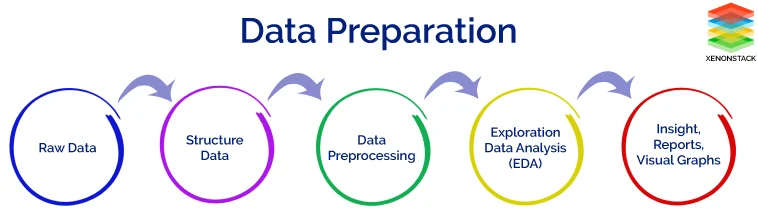

Source: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

##Import Libraries

In [1]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

In [3]:
pip install -q kaggle

In [4]:
import opendatasets as od
dataset_url = "https://www.kaggle.com/datasets/sukhmanibedi/cars4u"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: renesalmon
Your Kaggle Key: ··········


100%|██████████| 169k/169k [00:00<00:00, 29.0MB/s]

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

##Read Dataset

In [6]:
data = pd.read_csv("/content/cars4u/used_cars_data.csv")

##Analyze data

Goal: Gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.

In [7]:
#shape – shape will display the number of observations(rows) and features(columns) in the dataset
data.shape

(7253, 14)

In [8]:
#head()  will display the top 5 observations of the dataset
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [9]:
#tail() will display the last 5 observations of the dataset
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [10]:
#info() helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [11]:
#Check for duplication
#nunique() based on several unique values in each column and the data description, 
#we can identify the continuous and categorical columns in the data. 
#Duplicated data can be handled or removed based on further analysis
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [12]:
#Count unique car names and how often their appear
data["Name"].value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

In [13]:
#Search for spezific car e.g. Porsche in database
data.loc[data["Name"].str.contains("Porsche", case=False)]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
70,70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.5 kmpl,4806 CC,500 bhp,5.0,NaN,14.50
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0 kmpl,3436 CC,null bhp,2.0,NaN,40.00
1078,1078,Porsche Boxster S tiptronic,Kolkata,2015,10512,Petrol,Automatic,First,8.6 kmpl,2706 CC,265 bhp,2.0,NaN,64.00
1755,1755,Porsche Cayenne Diesel,Mumbai,2013,70000,Diesel,Automatic,First,15.15 kmpl,2967 CC,240 bhp,5.0,NaN,40.00
2100,2100,Porsche Cayenne Turbo S,Mumbai,2010,35000,Petrol,Automatic,Second,11.9 kmpl,4806 CC,550 bhp,5.0,NaN,32.00
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0 kmpl,3436 CC,null bhp,2.0,NaN,43.00
2659,2659,Porsche Panamera Diesel,Kolkata,2015,25100,Diesel,Automatic,First,17.85 kmpl,2967 CC,300 bhp,4.0,NaN,75.00
2706,2706,Porsche Panamera Diesel 250hp,Kochi,2014,60033,Diesel,Automatic,First,18.18 kmpl,2967 CC,250 bhp,4.0,NaN,51.52
2896,2896,Porsche Panamera Diesel,Delhi,2013,48000,Diesel,Automatic,Second,17.85 kmpl,2967 CC,300 bhp,4.0,NaN,50.50
2978,2978,Porsche Panamera 2010 2013 4S,Coimbatore,2010,42400,Petrol,Automatic,Third,8.0 kmpl,4806 CC,394.3 bhp,4.0,NaN,42.91


In [14]:
data.loc[data["Name"].str.contains("Porsche", case=False)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 70 to 6740
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              19 non-null     int64  
 1   Name               19 non-null     object 
 2   Location           19 non-null     object 
 3   Year               19 non-null     int64  
 4   Kilometers_Driven  19 non-null     int64  
 5   Fuel_Type          19 non-null     object 
 6   Transmission       19 non-null     object 
 7   Owner_Type         19 non-null     object 
 8   Mileage            19 non-null     object 
 9   Engine             19 non-null     object 
 10  Power              19 non-null     object 
 11  Seats              19 non-null     float64
 12  New_Price          1 non-null      object 
 13  Price              18 non-null     float64
dtypes: float64(2), int64(3), object(9)
memory usage: 2.2+ KB


In [15]:
#Missing values calculation
#isnull() is widely been in all pre-processing steps to identify null values in the data
#In our example, data.isnull().sum() is used to get the number of missing records in each column
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [16]:
#calculate the percentage of missing values in each column
(data.isnull().sum()/(len(data)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

##Data reduction

In [17]:
#Some columns or variables can be dropped if they do not add value to our analysis.
#In our dataset, the column S.No have only ID values, assuming they don’t have any predictive power to predict the dependent variable.
# Remove S.No. column from data
data = data.drop(['S.No.'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [18]:
#Check changes in table => S.No should been missing now
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


##Feature Engineering

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

In [19]:
#We believe Car_Age will be a good predictor for the price of a car
#So we have to create a feature that shows us the Car_Age
#Create a Car_Age column
from datetime import date
date.today().year
data['Car_Age']=date.today().year - data["Year"]
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,7
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,11
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,10
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,9


In [20]:
#We believe that model and brand name will be a good predictor, too.
#Lets create a feature column for brand and one for model
data["Brand"] = data.Name.str.split().str.get(0)
data["Model"] = data.Name.str.split().str.get(1)
data[["Name", "Brand", "Model"]]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta
2,Honda Jazz V,Honda,Jazz
3,Maruti Ertiga VDI,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,Vento
7249,Volkswagen Polo GT TSI,Volkswagen,Polo
7250,Nissan Micra Diesel XV,Nissan,Micra
7251,Volkswagen Polo GT TSI,Volkswagen,Polo


##Data Cleaning

Some names of the variables are not relevant and not easy to understand. Some data may have data entry errors, and some variables may need data type conversion. We need to fix this issue in the data.

In [21]:
print(data.Brand.unique())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [22]:
searchfor = ["Isuzu", "ISUZU", "Mini", "Land"]
data[data.Brand.str.contains('|'.join(searchfor))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,8,Land,Rover
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,10,Land,Rover
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,5,Mini,Countryman
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,4,Land,Rover
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,5,Mini,Cooper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,NaN,NaN,5,ISUZU,D-MAX
7132,Mini Clubman Cooper S,Pune,2017,2890,Petrol,Manual,First,13.8 kmpl,1998 CC,192 bhp,5.0,44.59 Lakh,NaN,5,Mini,Clubman
7157,Land Rover Range Rover 2.2L Pure,Hyderabad,2015,49000,Diesel,Automatic,Second,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,NaN,7,Land,Rover
7160,Mini Cooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.8 kmpl,1998 CC,112 bhp,5.0,NaN,NaN,9,Mini,Cooper


In [23]:
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper", "Land": "Land Rover" }, inplace=True )

In [24]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,12,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,7,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,11,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,10,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,9,Audi,A4


In [25]:
#Check it update worked => Check Brand colum
data[data.Brand.str.contains('|'.join(searchfor))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,8,Land Rover,Rover
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,10,Land Rover,Rover
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,5,Mini Cooper,Countryman
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,4,Land Rover,Rover
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,5,Mini Cooper,Cooper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,NaN,NaN,5,Isuzu,D-MAX
7132,Mini Clubman Cooper S,Pune,2017,2890,Petrol,Manual,First,13.8 kmpl,1998 CC,192 bhp,5.0,44.59 Lakh,NaN,5,Mini Cooper,Clubman
7157,Land Rover Range Rover 2.2L Pure,Hyderabad,2015,49000,Diesel,Automatic,Second,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,NaN,7,Land Rover,Rover
7160,Mini Cooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.8 kmpl,1998 CC,112 bhp,5.0,NaN,NaN,9,Mini Cooper,Cooper


##EDA Exploratory Data Analysis

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

* EDA can be leveraged to check for 
outliers, patterns, and trends in the given data.
* EDA helps to find meaningful patterns in data.
* EDA provides in-depth insights into the data sets to solve our business problems.
* EDA gives a clue to impute missing values in the dataset 

**Statistics Summary** 


Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
Car_Age,7253.0,8.634634,3.254421,3.00,6.0,8.00,11.00,26.0


In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
Car_Age,7253.0,8.634634,3.254421,3.00,6.0,8.00,11.00,26.0


In [28]:
describe_num_df = data.describe(include=["int64","float64"]).round()
describe_num_df.reset_index(inplace=True)
describe_num_df

,index,Year,Kilometers_Driven,Seats,Price,Car_Age
0,count,7253.0,7253.0,7200.0,6019.0,7253.0
1,mean,2013.0,58699.0,5.0,9.0,9.0
2,std,3.0,84428.0,1.0,11.0,3.0
3,min,1996.0,171.0,0.0,0.0,3.0
4,25%,2011.0,34000.0,5.0,4.0,6.0
5,50%,2014.0,53416.0,5.0,6.0,8.0
6,75%,2016.0,73000.0,5.0,10.0,11.0
7,max,2019.0,6500000.0,10.0,160.0,26.0


In [29]:
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df["index"] != "count"]
describe_num_df

,index,Year,Kilometers_Driven,Seats,Price,Car_Age
1,mean,2013.0,58699.0,5.0,9.0,9.0
2,std,3.0,84428.0,1.0,11.0,3.0
3,min,1996.0,171.0,0.0,0.0,3.0
4,25%,2011.0,34000.0,5.0,4.0,6.0
5,50%,2014.0,53416.0,5.0,6.0,8.0
6,75%,2016.0,73000.0,5.0,10.0,11.0
7,max,2019.0,6500000.0,10.0,160.0,26.0


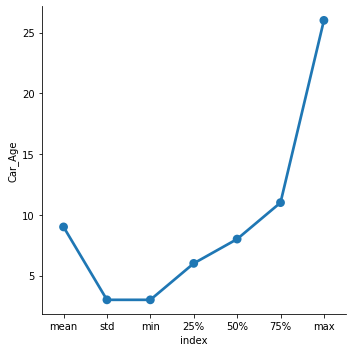

In [30]:
sns.factorplot(x ='index', y ="Car_Age", data=describe_num_df)
plt.show()

index
index
Year


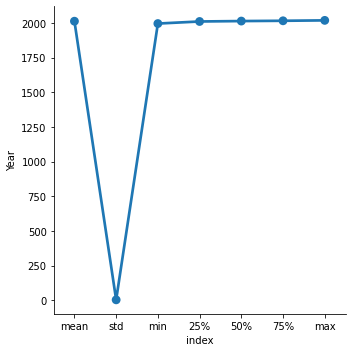

Kilometers_Driven


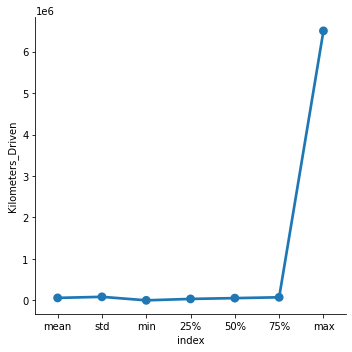

Seats


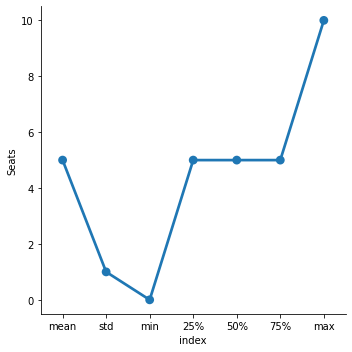

Price


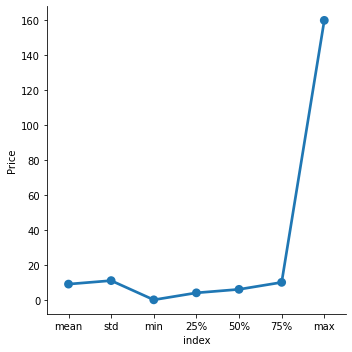

Car_Age


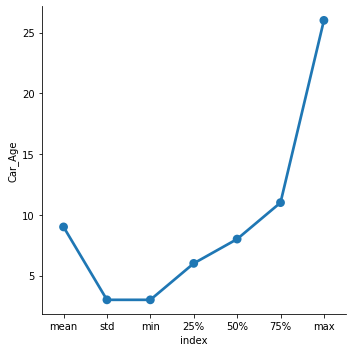

In [31]:
for i in describe_num_df:
  print(i)
  if i in ["index"]:
    print(i)
    continue
  sns.factorplot(x ='index', y =i, data=describe_num_df)
  plt.show()

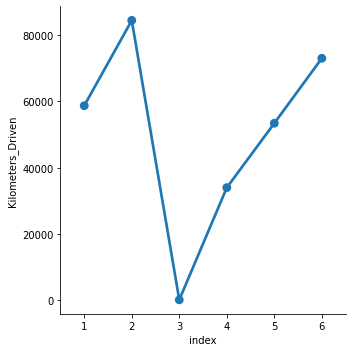

In [32]:
#Max droppen, um KM Graphen besser zu lesen
df_distance = pd.DataFrame(describe_num_df["Kilometers_Driven"])
df_distance
df_distance['index'] = df_distance.index
df_distance = df_distance.drop(index=7)
sns.factorplot(x="index", y ="Kilometers_Driven", data=df_distance)
plt.show()

**Learnings from stats**

* Years range from 1996- 2019 and has a high in a range which shows used cars contain both latest models and old model cars.
* On average of Kilometers-driven in Used cars are ~58k KM. The range shows a huge difference between min and max as max values show 650000 KM shows the evidence of an outlier. This record can be removed.
* Min value of Mileage shows 0 cars won’t be sold with 0 mileage. This sounds like a data entry issue.
* It looks like Engine and Power have outliers, and the data is right-skewed.
* The average number of seats in a car is 5. car seat is an important feature in price contribution.
* The max price of a used car is 160k which is quite weird, such a high price for used cars. There may be an outlier or data entry issue.

In [33]:
data_all = data.describe(include="all").T

**Before we do EDA, lets separate Numerical and categorical variables for easy analysis**

In [34]:
#Get categorical variables
cat_cols = data.select_dtypes(include=["object"]).columns
cat_cols

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')

In [35]:
#Get numerical variables
num_cols = data.select_dtypes(include=np.number).columns.tolist()
num_cols

['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age']

#EDA Univariate Analysis


Analyzing/visualizing the dataset by taking one variable at a time:
Data visualization is essential; we must decide what charts to plot to better understand the data. 

Categorical variables can be visualized using a... 
* Count plot
* Bar Chart
* Pie Plot, etc.

Numerical Variables can be visualized using
* Histogram 
* Box Plot
* Density Plot, etc.

Year
Skew : -0.84


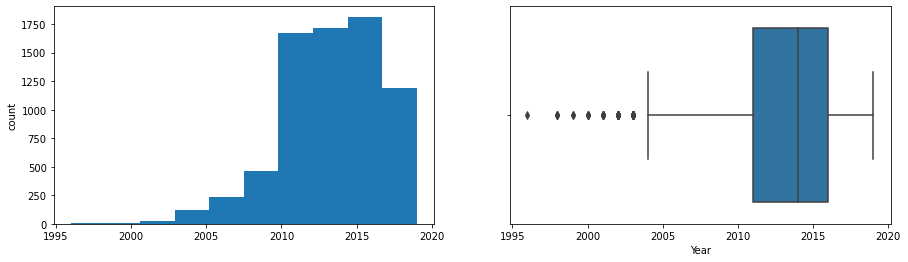

Kilometers_Driven
Skew : 61.58


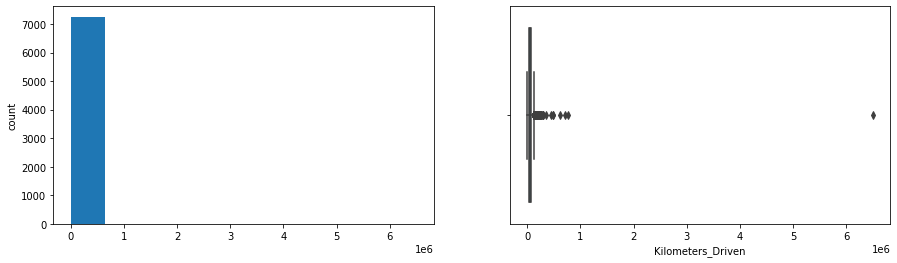

Seats
Skew : 1.9


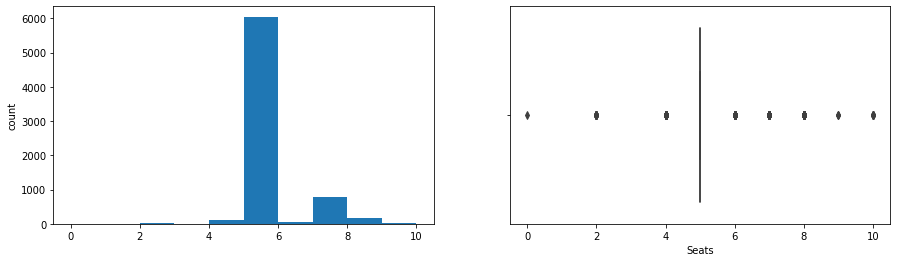

Price
Skew : 3.34


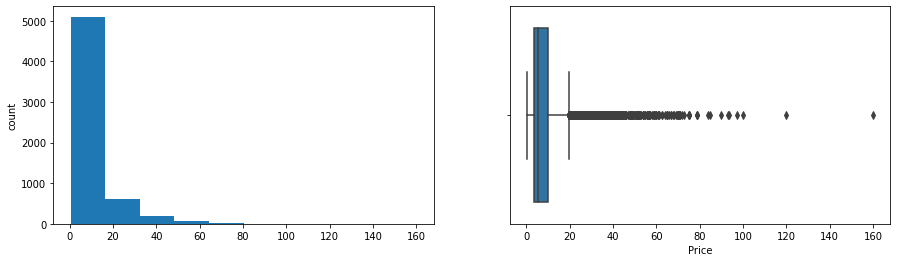

Car_Age
Skew : 0.84


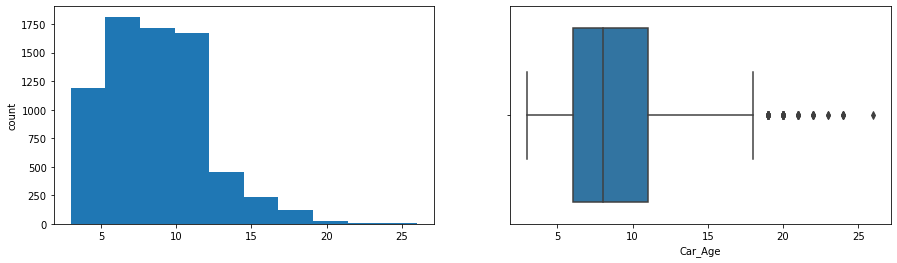

In [36]:
#In our example, we have done a Univariate analysis using 
#Histogram and  Box Plot for continuous Variables.
#In the below fig, a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

**Summary**
Price and Kilometers Driven are right skewed for this data to be transformed, and all outliers will be handled during imputation

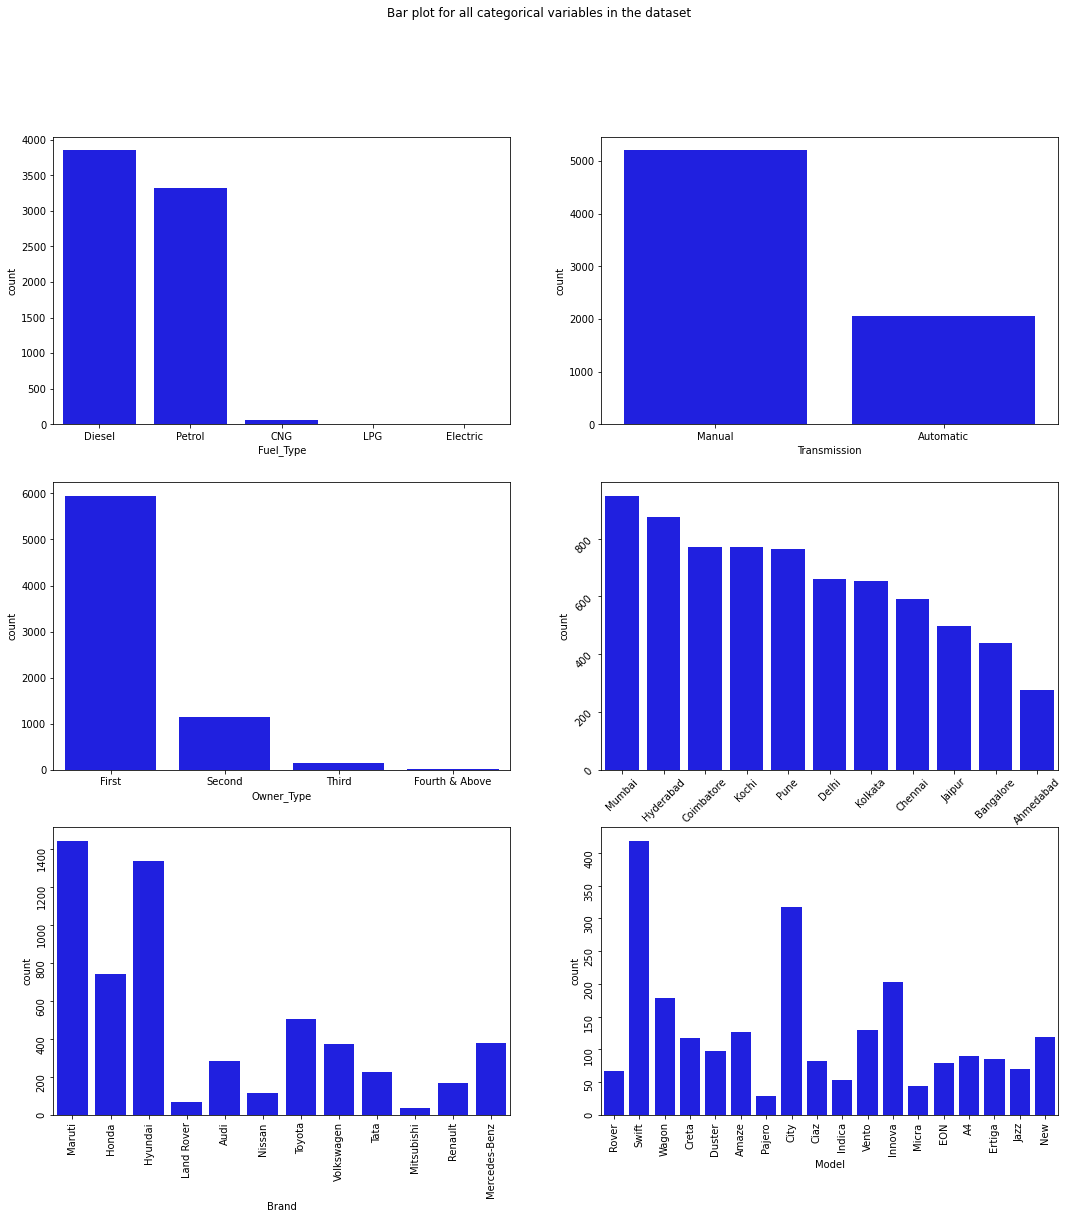

In [37]:
#categorical variables are being visualized using a count plot. Categorical variables provide the pattern of factors influencing car price
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue', 
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue', 
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'blue', 
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue', 
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue', 
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue', 
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

**Observations**
* Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore
* ~53% of cars have fuel type as Diesel this shows diesel cars provide higher performance
* ~72% of cars have manual transmission
* ~82 % of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars
* ~20% of cars belong to the brand Maruti followed by 19% of cars belonging to Hyundai
* WagonR ranks first among all models which are available for purchase

##Data Transformation

Before we proceed to Bi-variate Analysis, Univariate analysis demonstrated the data pattern as some variables to be transformed.

Price and Kilometer-Driven variables are highly skewed and on a larger scale. Let’s do log transformation.

Log transformation can help in normalization, so this variable can maintain standard scale with other variables:

In [38]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [39]:
log_transform(data,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7251 non-null   object 
 8   Engine                 7207 non-null   object 
 9   Power                  7207 non-null   object 
 10  Seats                  7200 non-null   float64
 11  New_Price              1006 non-null   object 
 12  Price                  6019 non-null   float64
 13  Car_Age                7253 non-null   int64  
 14  Brand                  7253 non-null   object 
 15  Mode

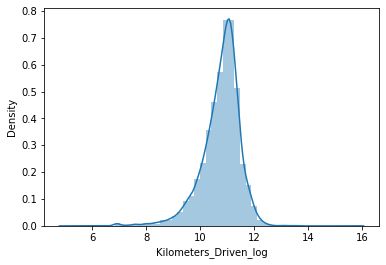

In [40]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");

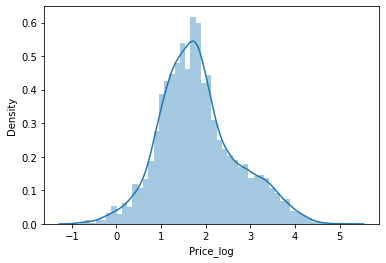

In [41]:
#Log transformation of the feature 'Price'
sns.distplot(data["Price_log"], axlabel="Price_log");

##EDA Bivariate Analysis

Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

In our example, a pair plot has been used to show the relationship between two Categorical variables.

<Figure size 936x1224 with 0 Axes>

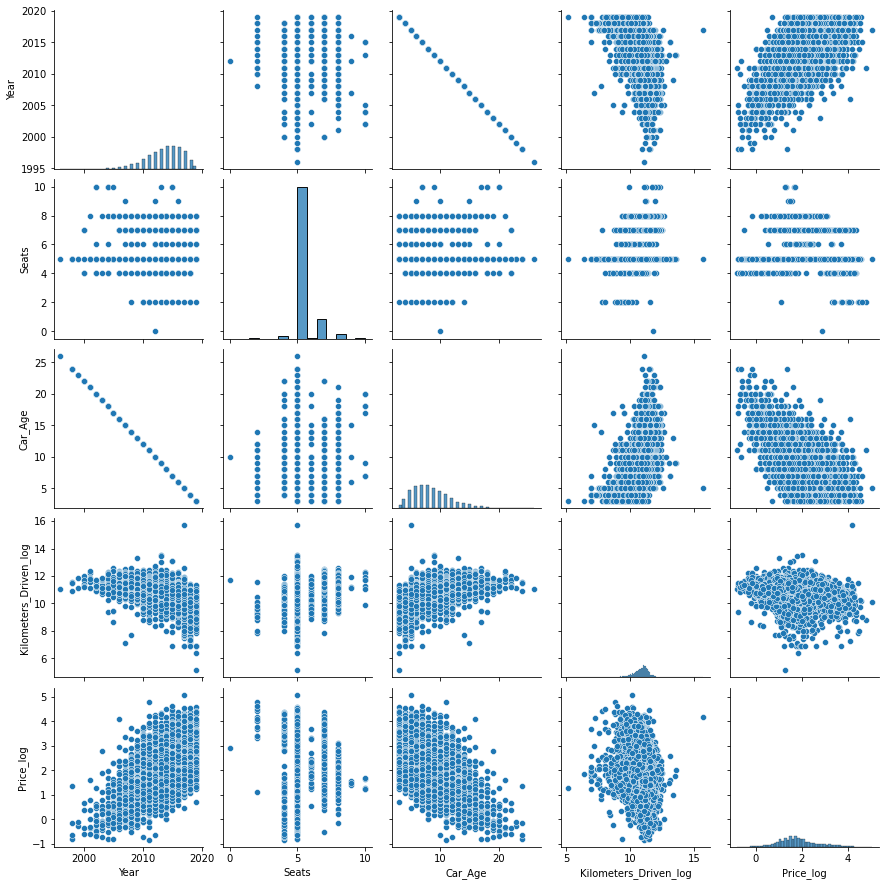

In [42]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

**Which insights did we win from this plots?**


* The variable year has a postive correlation between price and mileage
* A year has a negative correlation with kilomters_driven
* Recently produced cars are higher in price. A the age of the car increases prices decreases  

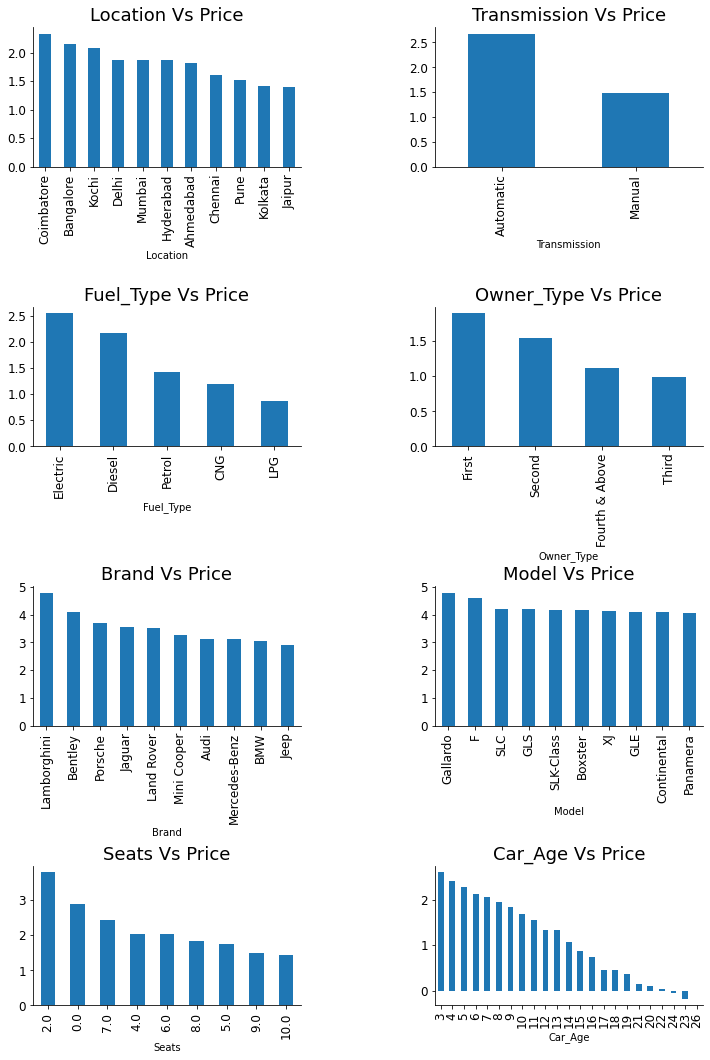

In [43]:
#A bar plot can be used to show the relationship between Categorical variables and continuous variables
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

**Observations**

* The price of cars is high in Coimbatore and less price in Kolkata and Jaipur
* Automatic cars have more price than manual cars.
* Diesel and Electric cars have almost the same price, which is maximum, and LPG cars have the lowest price
* First-owner cars are higher in price, followed by a second
* The third owner’s price is lesser than the Fourth and above
* Lamborghini brand is the highest in price
* Gallardocoupe Model is the highest in price
* 2 Seater has the highest price followed by 7 Seater
* The latest model cars are high in price

##EDA Multivariate Analysis

Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

A heat map is widely been used for Multivariate Analysis

Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

In our example heat map shows the correlation between the variables.

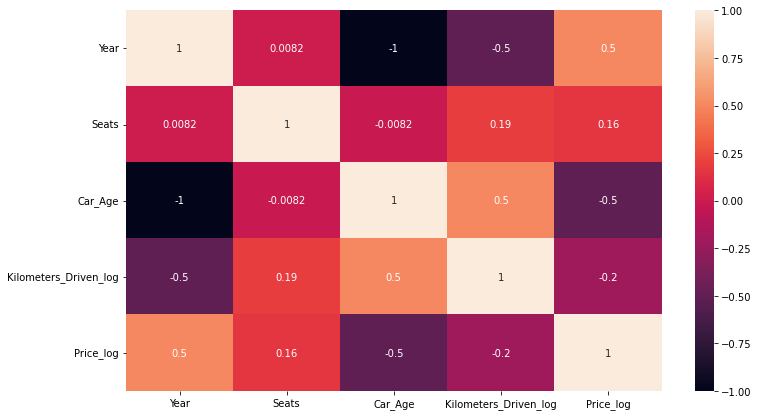

In [44]:
plt.figure(figsize=(12,7))
sns.heatmap(data.drop(['Kilometers_Driven', "Price"],axis=1).corr(), annot = True, vmin = -1, vmax= 1)
plt.show()

**Which insights could we win from the heatmap?**
